# Plotting Tiles

## Objectives

Introduce several different methods for plotting ECCO v4 fields that are stored as tiles in `Datasets` or `DataArrays`.  Emphasis is placed on fields stored on the ECCO v4 native llc90 grid and loaded from NetCDF tile files.

## Introduction

*"Over the years many different plotting modules and packages have been developed for Python. For most of that time there was no clear favorite package, but recently matplotlib has become the most widely used. Nevertheless, many of the others are still available and may suit your tastes or needs better. Some of these are interfaces to existing plotting libraries while others are Python-centered new implementations.*
-- from : https://wiki.python.org/moin/NumericAndScientific/Plotting


The link above profiles a long list of Python tools for plotting.  In this tutorial we use just two libraries, *matplotlib* and *Cartopy*.

### matplotlib
*"Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits."*

*"For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with [Juypter Notebooks]. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users."*
-- from https://matplotlib.org/index.html

Matplotlib and pyplot even have a tutorial: https://matplotlib.org/users/pyplot_tutorial.html

### Cartopy

"Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses."

Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps.

Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.

You will find cartopy especially useful for large area / small scale data, where Cartesian assumptions of spherical data traditionally break down. If you’ve ever experienced a singularity at the pole or a cut-off at the dateline, it is likely you will appreciate cartopy’s unique features!"*

-- from https://scitools.org.uk/cartopy/docs/latest/


## The default orientation of the lat-lon-cap tile fields

Before we begin plotting ECCOv4 fields on the native llc90 model grid we are reminded how how the 13 tiles are oriented with respect to their "local" **x** and **y** and with respect to each other.

![llc90 tile layout](../figures/llc90_0.png)

Tiles 7-12 are rotated 90 degrees counter-clockwise relative to tiles 0-5.

> **Note:**  *The rotated orientation of tiles 7-12 presents some complications but don't panic!  The good news is that you don't need to reorient tiles to plot them.*

## Plotting single tiles using ``imshow``, ``pcolormesh``, and ``contourf``

First, let's load the all 13 tiles for sea surface height and the model grid parameters.

In [1]:
import numpy as np
import sys
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load some useful cartopy routines
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# and a new matplotlib routine 
import matplotlib.path as mpath

In [3]:
## Import the ecco_v4_py library into Python
## =========================================

## -- If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it.  For example, if your ecco_v4_py
##    files are in /Users/ifenty/ECCOv4-py/ecco_v4_py, then use:

sys.path.append('/home/ifenty/ECCOv4-py')
import ecco_v4_py as ecco

In [4]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================
# base_dir = homehome/username/'
base_dir = '/home/ifenty/ECCOv4-release'

## define a high-level directory for ECCO fields
ECCO_dir = base_dir + '/Release3_alt'

In [5]:
## Load the model grid
grid_dir= ECCO_dir + '/nctiles_grid/'

ecco_grid = ecco.load_ecco_grid_nc(grid_dir, 'ECCOv4r3_grid.nc')

## Load one year of 2D daily data, SSH, SST, and SSS 
day_mean_dir= ECCO_dir + '/nctiles_daily/'

ecco_vars = ecco.recursive_load_ecco_var_from_years_nc(day_mean_dir, \
                                           vars_to_load=['SSH','THETA', 'SALT'], \
                                           years_to_load=2000)

## Merge the ecco_grid with the ecco_vars to make the ecco_ds
ecco_ds = xr.merge((ecco_grid , ecco_vars)).load()                                      

loading files of  SALT
loading files of  SSH
loading files of  THETA


### Plotting a single tile with ``imshow``

First we'll plot the average SSH for the first month (Jan 1992) on tiles 3, 7, and 8 using the basic `imshow` routine from *pyplot*.  We are plotting these three different tiles to show that these lat-lon-cap tiles all have a different orientation in $x$ and $y$.

> **Note:** *The **origin='lower'** argument to `imshow` is required to make the $y$ origin at the bottom of the plot.*

#### Tile 2 (Northeast Atlantic)

Text(0, 0.5, 'y -->')

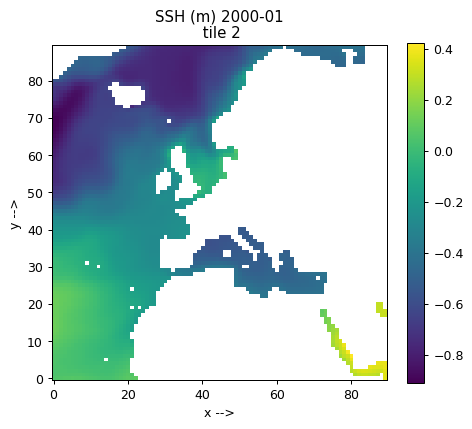

In [6]:
plt.figure(figsize=(6,5), dpi= 90)

# Step 1, select the tile to plot using the **.isel( )** syntax.  
tile_to_plot = ecco_ds.SSH.isel(tile=2, time=0)
tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=2,k=0) !=0, np.nan)

# Step 2, use plt.imshow() 
plt.imshow(tile_to_plot, origin='lower');

# Step 3, add colorbar, title, and x and y axis labels
plt.colorbar()
plt.title('SSH (m) ' + str(ecco_ds.time[0].values)[0:7] + '\n tile 2')
plt.xlabel('x -->')
plt.ylabel('y -->')

Tiles 0-5 are by default in a quasi-lat-lon orientation.  +$x$ is to the east and +$y$ is to the north.

#### Tile 6 (the Arctic cap)

This time we'll plot the Arctic cap tile 6.  Notice the layout of the Arctic cap tile in $x$ and $y$.  We'll follow the same procedure for plotting except we'll use LaTeX to add arrows in the $x$ and $y$ axis labels (for fun).

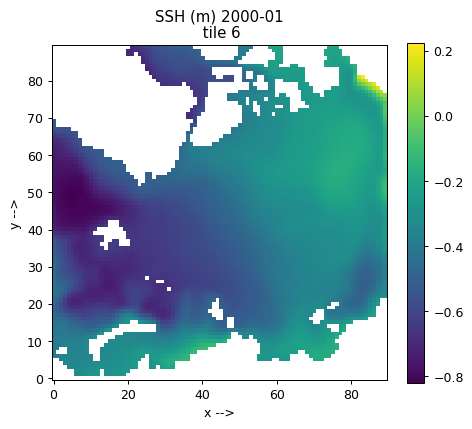

In [7]:
plt.figure(figsize=(6,5), dpi= 90)

# Step 1, select the tile to plot using the **.isel( )** syntax.  
tile_to_plot = ecco_ds.SSH.isel(tile=6, time=0)
tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=6,k=0) !=0, np.nan)

# Step 2, use plt.imshow() 
plt.imshow(tile_to_plot, origin='lower');

# Step 3, add colorbar, title, and x and y axis labels
plt.colorbar()
plt.title('SSH (m) ' + str(ecco_ds.time[0].values)[0:7] + '\n tile 6')
plt.xlabel('x -->');
plt.ylabel('y -->');

Because tile 6 is the Arctic cap, $x$ and $y$ do not map to east and west throughout the domain.

#### Tile 7 (N. Pacific / Bering Sea / Chukchi Sea)

For tiles 7-12 , positive $x$ is southwards and positive $y$ is eastwards.

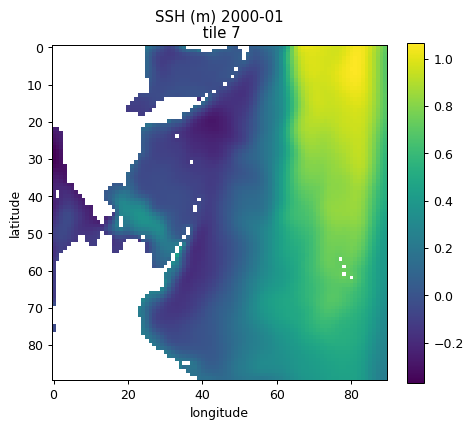

In [8]:
plt.figure(figsize=(6,5), dpi= 90)

# pull out lats and lons
tile_num=7
tile_to_plot = ecco_ds.SSH.isel(tile=tile_num, time=1)
tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)

plt.imshow(tile_to_plot)
plt.colorbar()
plt.title('SSH (m) ' + str(ecco_ds.time[1].values)[0:7] + '\n tile ' + str(tile_num))
plt.xlabel('longitude');
plt.ylabel('latitude');

Tiles 7-12 are are also in a quasi-lat-lon orientation except that +$x$ is roughly south and +$y$ is roughy east.

### Plotting a single tile with ``pcolor`` and ``contourf``

The `pcolor` and `contourf` routines allows us to add latitude and longitude to the figure.  Because SSH is a 'c' point variable, its lat/lon coordinates are *YC* and *XC*

We can't plot the Arctic cap tile with pcolor and contourf using latitude and longitude for the plot x and y axes because of the singularity at the pole and the 360 wrapping in longitude.  

Instead, we will demonstrate ``pcolor`` and ``contourf`` for tile 2.

#### Tile 2 (Northeast N. Atlantic)

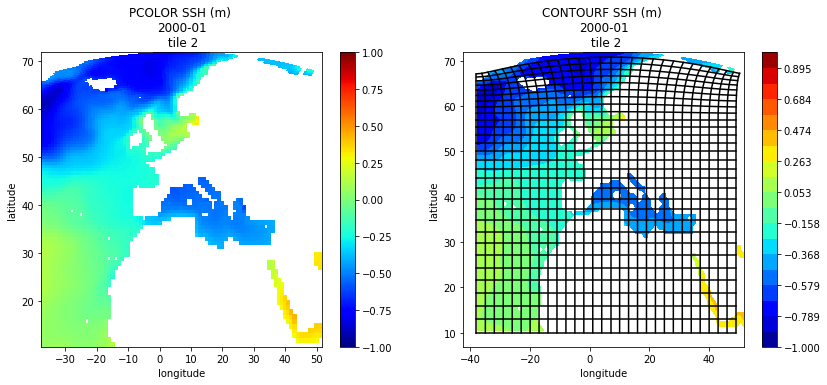

In [9]:
fig=plt.figure(figsize=(10, 10))

tile_num=2

# pull out lats and lons
lons = ecco_ds.XC.sel(tile=tile_num)
lats = ecco_ds.YC.sel(tile=tile_num)
tile_to_plot = ecco_ds.SSH.isel(tile=tile_num, time=1)

# mask to NaN where hFacC is == 0 
# syntax is actually "keep where hFacC is not equal to zero"
tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)

# create subplot for pcolor
fig = plt.subplot(221)

# use pcolor with 'lons' and 'lats' for the plot x and y axes 
plt.pcolor(lons, lats, tile_to_plot, vmin=-1, vmax=1, cmap='jet')
plt.colorbar()
plt.title('PCOLOR SSH (m) \n' + str(ecco_ds.time[1].values)[0:7] + '\n tile ' + str(tile_num))
plt.xlabel('longitude')
plt.ylabel('latitude')

# create subplot for contourf
fig=plt.subplot(222)

# use contourf with 'lons' and 'lats' for the plot x and y axes 
plt.contourf(lons, lats, tile_to_plot, np.linspace(-1,1, 20,endpoint=True), cmap='jet', vmin=-1, vmax=1)
plt.title('CONTOURF SSH (m) \n' + str(ecco_ds.time[1].values)[0:7] + '\n tile ' + str(tile_num))
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()

# plot every 3rd model grid line to show how tile 3 is 'warped' above around 60N
plt.plot(ecco_ds.XG.isel(tile=tile_num)[::3,::3], ecco_ds.YG.isel(tile=tile_num)[::3,::3],'k-')
plt.plot(ecco_ds.XG.isel(tile=tile_num)[::3,::3].T, ecco_ds.YG.isel(tile=tile_num)[::3,::3].T,'k-')

# push the subplots away from each other a bit
plt.subplots_adjust(bottom=0, right=1.2, top=.9)

#### Tile 7 (N. Pacific / Bering Sea / Chukchi Sea)

If longitude and latitude are passed as the 'x' and 'y' arguments to `pcolor` and `contourf` then the fields will be oriented geographically.

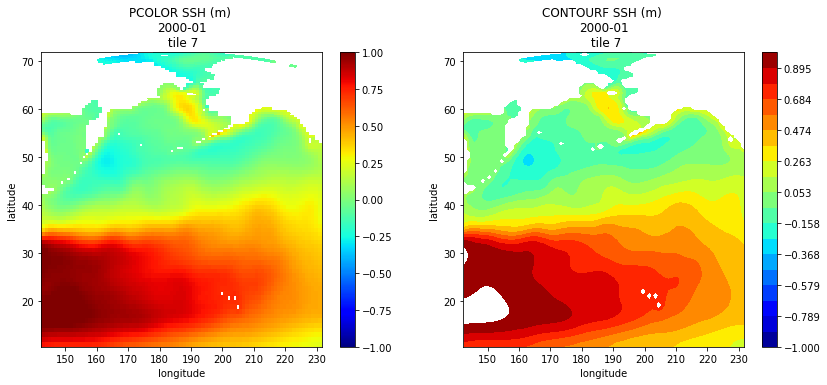

In [10]:
fig=plt.figure(figsize=(10, 10))

tile_num=7

# pull out lats and lons
lons = np.copy(ecco_ds.XC.sel(tile=tile_num))

# we must convert the longitude coordinates from 
# [-180 to 180] to [0 to 360] 
# because of the crossing of the international date line.
lons[lons < 0] = lons[lons < 0]+360

lats = ecco_ds.YC.sel(tile=tile_num)
tile_to_plot = ecco_ds.SSH.isel(tile=tile_num, time=1)

# mask to NaN where hFacC is == 0 
# syntax is actually "keep where hFacC is not equal to zero"
tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)

# create subplot for pcolor
fig = plt.subplot(221)

# use pcolor with 'lons' and 'lats' for the plot x and y axes 
plt.pcolor(lons, lats, tile_to_plot, vmin=-1, vmax=1, cmap='jet')
plt.colorbar()
plt.title('PCOLOR SSH (m) \n' + str(ecco_ds.time[1].values)[0:7] + '\n tile ' + str(tile_num))
plt.xlabel('longitude')
plt.ylabel('latitude')

# create subplot for contourf
fig=plt.subplot(222)

# use contourf with 'lons' and 'lats' for the plot x and y axes 
plt.contourf(lons, lats, tile_to_plot, np.linspace(-1,1, 20,endpoint=True), cmap='jet', vmin=-1, vmax=1)
plt.title('CONTOURF SSH (m) \n' + str(ecco_ds.time[1].values)[0:7] + '\n tile ' + str(tile_num))
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.colorbar()

# push the subplots away from each other a bit
plt.subplots_adjust(bottom=0, right=1.2, top=.9)

## Plotting fields from one tile using ``Cartopy``

The ``Cartopy`` package provides routines to make plots using different geographic projections.  We'll demonstrate plotting these three tiles again using *Cartopy*.

To see a list of ``Cartopy`` projections, see http://pelson.github.io/cartopy/crs/projections.html

### Geographic Projections (AKA: plate carrée)

``Cartopy`` works by transforming geographic coordintes (lat/lon) to new x,y coordinates associated with different projections.  The most familiar projection is the so-called geographic projection (aka plate carree).  When we plotted tiles using ``pcolor`` and ``contourf`` we were de-factor using the plate carree projection longitude and latitude were the 'x' and the 'y' of the plot.  

With ``Cartopy`` we can make similar plots in the plate carree projection system and also apply some cool extra details, like land masks. 

We'll demonstrate on tiles 2 and 7 (again skipping tile 6 (Arctic cap) because we cannot use geographic coordinates as x and y when there is a polar singularity and 360 degrees of longitude.

#### Tile 2 with plate carree

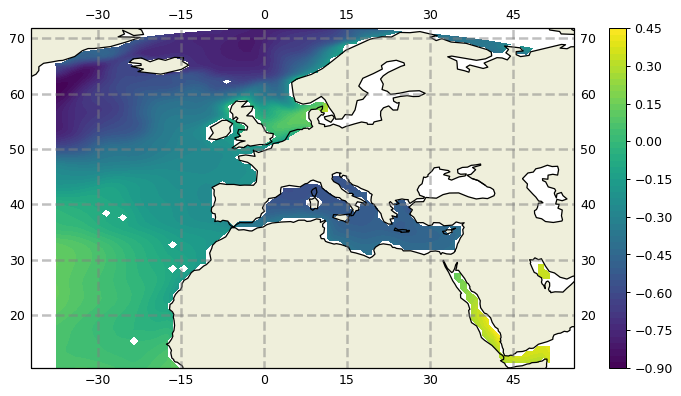

In [11]:
tile_num=2

lons = ecco_ds.XC.isel(tile=tile_num)
lats = ecco_ds.YC.isel(tile=tile_num)

tile_to_plot = ecco_ds.SSH.isel(tile=tile_num, time=1)
# mask to NaN where hFacC is == 0 
# syntax is actually "keep where hFacC is not equal to zero"
tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)

plt.figure(figsize=(10,5), dpi= 90)

# here is where you specify what projection you want to use
ax = plt.axes(projection=ccrs.PlateCarree())

# here is here you tell Cartopy that the projection 
# of your 'x' and 'y' are geographic (lons and lats)
# and that you want to transform those lats and lons 
# into 'x' and 'y' in the projection
plt.contourf(lons, lats, tile_to_plot, 60,
             transform=ccrs.PlateCarree());

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--');
ax.coastlines()
ax.add_feature(cfeature.LAND)

plt.colorbar()

Other features we could have added include:


~~~
cartopy.feature.BORDERS
	Country boundaries.

cartopy.feature.COASTLINE
	Coastline, including major islands.

cartopy.feature.LAKES
	Natural and artificial lakes.

cartopy.feature.LAND
	Land polygons, including major islands.

cartopy.feature.OCEAN
	Ocean polygons.

cartopy.feature.RIVERS
	Single-line drainages, including lake centerlines.
~~~



Let's add geographic borders just to demonstrate how extra features can be added to a ``Cartopy`` map

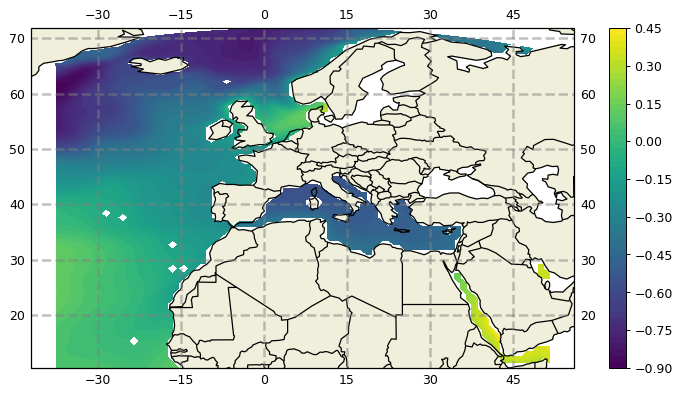

In [12]:
plt.figure(figsize=(10,5), dpi= 90)

# here is where you specify what projection you want to use
ax = plt.axes(projection=ccrs.PlateCarree())

# here is here you tell Cartopy that the projection 
# of your 'x' and 'y' are geographic (lons and lats)
# and that you want to transform those lats and lons 
# into 'x' and 'y' in the projection
plt.contourf(lons, lats, tile_to_plot, 60,
             transform=ccrs.PlateCarree());

gl = ax.gridlines(crs=ccrs.PlateCarree(), \
                  draw_labels=True,
                  linewidth=2, color='gray', \
                  alpha=0.5, linestyle='--');
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
plt.colorbar()

#### Tile 7 with plate carree

To use the plate carree projection across the international date line specify the *central_longitude=-180* argument when defining the projection and for creating the gridlines. (see https://stackoverflow.com/questions/13856123/setting-up-a-map-which-crosses-the-dateline-in-cartopy)

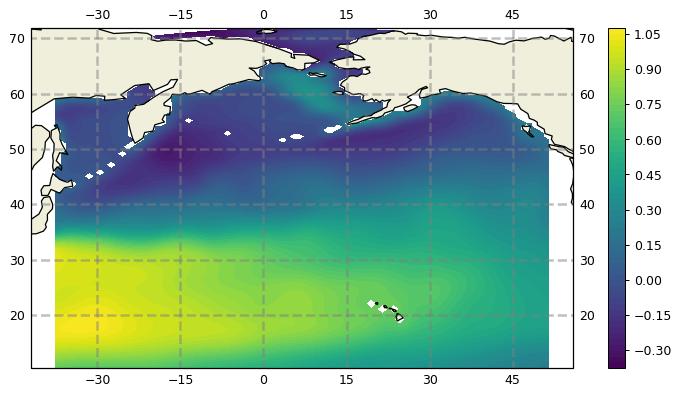

In [13]:
tile_num=7

# pull out lats and lons
lons = np.copy(ecco_ds.XC.sel(tile=tile_num))

# we must convert the longitude coordinates from 
# [-180 to 180] to [0 to 360] 
# because of the crossing of the international date line.
lons[lons < 0] = lons[lons < 0]+360
lats = ecco_ds.YC.isel(tile=tile_num)

tile_to_plot = ecco_ds.SSH.isel(tile=tile_num, time=1)
# mask to NaN where hFacC is == 0 
# syntax is actually "keep where hFacC is not equal to zero"
tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)

plt.figure(figsize=(10,5), dpi= 90)

# here is where you specify what projection you want to use
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))

# here is here you tell Cartopy that the projection of your 'x' and 'y' are geographic (lons and lats)
# and that you want to transform those lats and lons into 'x' and 'y' in the projection
plt.contourf(lons, lats, tile_to_plot, 60,
             transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(central_longitude=-180), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--');
ax.coastlines()
ax.add_feature(cfeature.LAND)
plt.colorbar()

### Polar Stereographic Projection

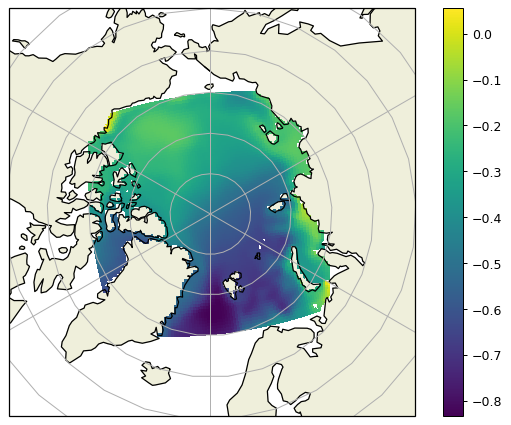

In [14]:
tile_num=6

lons = ecco_ds.XC.isel(tile=tile_num)
lats = ecco_ds.YC.isel(tile=tile_num)


tile_to_plot = ecco_ds.SSH.isel(tile=tile_num, time=1)

# mask to NaN where hFacC is == 0 
# syntax is actually "keep where hFacC is not equal to zero"
tile_to_plot = tile_to_plot.where(ecco_ds.hFacC.isel(tile=tile_num,k=0) !=0, \
                       np.nan)

plt.figure(figsize=(8,6), dpi= 90)


# Make a new projection, time of class "NorthPolarStereo"
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=70))

# here is here you tell Cartopy that the projection 
# of your 'x' and 'y' are geographic (lons and lats)
# and that you want to transform those lats and lons 
#into 'x' and 'y' in the projection
plt.pcolormesh(lons, lats, tile_to_plot,
               transform=ccrs.PlateCarree());

# plot land
ax.add_feature(cfeature.LAND)
ax.gridlines()
ax.coastlines()
plt.colorbar()

# Limit the map to -60 degrees latitude and below.
ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

#ax.set_boundary(circle, transform=ax.transAxes)

## Plotting all 13 tiles simultaneously: No Projection

### Plotting all 13 tiles with `plot_tiles`

The `plot_tiles` routine in the ``ecco_v4_py`` package makes plots of all 13 tiles of a field.  By default the routine will plot all of the tiles in the lat-lon-cap layout shown earlier.   

This routine will accept ``numpy arrays`` of dimension 13x90x90 or 2D slices of DataArrays with the same 13x90x90 dimension.  

There are several additional arguments which we can access using the ``help`` command.  Take a second to familiarize yourself with some of them.

In [15]:
help(ecco.plot_tiles)

Help on function plot_tiles in module ecco_v4_py.tile_plot:

plot_tiles(tiles, cmap='jet', layout='llc', rotate_to_latlon=False, Arctic_cap_tile_location=2, show_colorbar=False, show_cbar_label=False, show_tile_labels=True, cbar_label='', fig_size=9, **kwargs)
    Plots the 13 tiles of the lat-lon-cap (LLC) grid
    
    Parameters
    ----------
    tiles : numpy.ndarray or dask.array.core.Array or xarray.core.dataarray.DataArray
        an array of n=1..13 tiles of dimension n x llc x llc 
    
            - If *xarray DataArray* or *dask Array* tiles are accessed via *tiles.sel(tile=n)*
            - If *numpy ndarray* tiles are acceed via [tile,:,:] and thus n must be 13.
    
    cmap : matplotlib.colors.Colormap, optional, default: jet
        a colormap for the figure
    
    layout : string, optional, default 'llc'
        a code indicating the layout of the tiles
    
        :llc:    situates tiles in a fan-like manner which conveys how the tiles 
                 are orient

We've seen this routine used in a few earlier routines.  We'll provide some additional examples below:

#### Default 'native grid' layout

In [16]:
# optional arguments:
#   cbar       - show the colorbar
#   cmin, cmax - color range min and max
#   fsize      - figure size in inches

# pull out surface salinity
tmp_plt = ecco_ds.SALT.isel(time=3)

# mask to NaN where hFacC is == 0 
# syntax is actually "keep where hFacC is not equal to zero"
tmp_plt = tmp_plt.where(ecco_ds.hFacC.isel(k=0) != 0, np.nan)

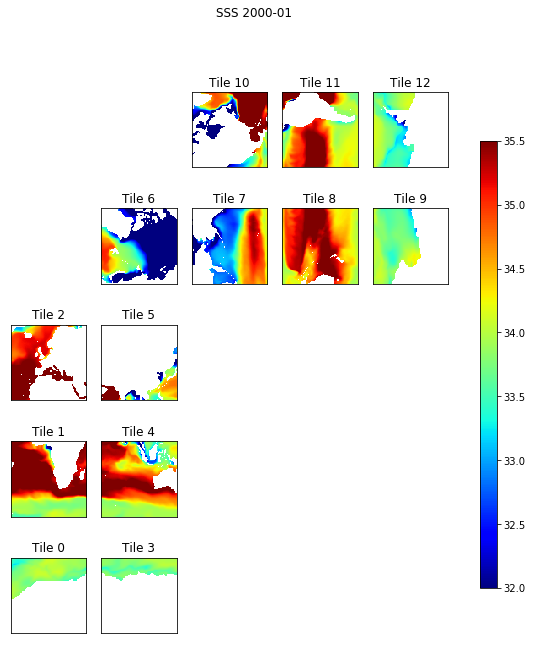

In [17]:
ecco.plot_tiles(tmp_plt, \
                cmin=32, \
                cmax=35.5, \
                show_colorbar=True);

# use `suptitle` (super title) to make a title over subplots.
plt.suptitle('SSS ' + str(ecco_ds.time[3].values)[0:7]);

#### lat-lon layout

Another option of `plot_tiles` is to show tiles 7-12 rotated and lined up tiles 0-5

> **Note:** *Rotation of tiles 7-13 is only for **plotting**.  These arrays are not rotated using this routine.  We'll show to how actually rotate these tiles in a later tutorial.*

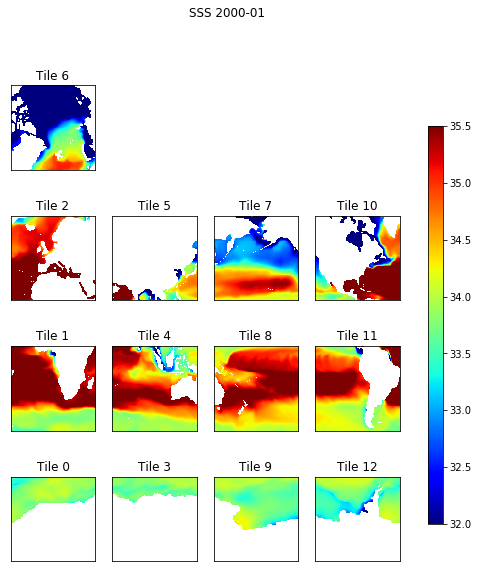

In [18]:
# optional arguments:
#   cbar       - show the colorbar
#   cmin, cmax - color range min and max
#   fsize      - figure size in inches

tmp_plt = ecco_ds.SALT.isel(time=3) 
tmp_plt = tmp_plt.where(ecco_ds.hFacC.isel(k=0) != 0, np.nan)
ecco.plot_tiles(tmp_plt, \
                cmin=32, cmax=35.5, \
                show_colorbar=True, fig_size=8,\
                layout='latlon', \
                rotate_to_latlon=True);

# use `suptitle` (super title) to make a title over subplots.
plt.suptitle('SSS ' + str(ecco_ds.time[3].values)[0:7]);

The version of `plot_tiles` is to remove the tile labels and put the titles together in a tight formation and sticks the Arctic tile over tile 10

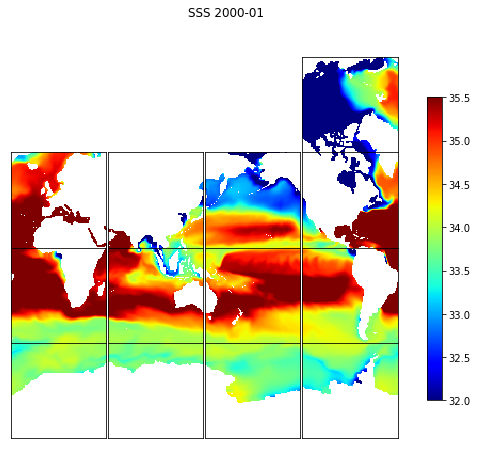

In [19]:
# optional arguments:
#   cbar       - show the colorbar
#   cmin, cmax - color range min and max
#   fsize      - figure size in inches

tmp_plt = ecco_ds.SALT.isel(time=3) 
tmp_plt = tmp_plt.where(ecco_ds.hFacC.isel(k=0) != 0, np.nan)
ecco.plot_tiles(tmp_plt, cmin=32, cmax=35.5, \
                show_colorbar=True, fig_size=8,\
               layout='latlon',rotate_to_latlon=True,\
               show_tile_labels=False, \
               Arctic_cap_tile_location=10)

# use `suptitle` (super title) to make a title over subplots.
plt.suptitle('SSS ' + str(ecco_ds.time[3].values)[0:7]);

 *Almost ready for the hyperwall!*


You can even pass ``plot_tiles`` a subset tiles from DataArray objects provided that the DataArrays have a 'tile' dimension.

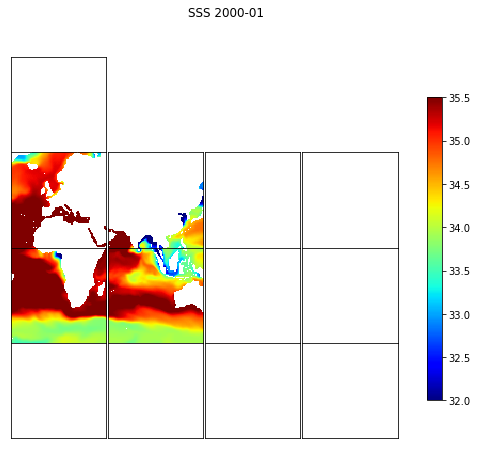

In [20]:
# optional arguments:
#   cbar       - show the colorbar
#   cmin, cmax - color range min and max
#   fsize      - figure size in inches

tmp_plt = ecco_ds.SALT.isel(time=3)
tmp_plt = tmp_plt.where(ecco_ds.hFacC.isel(k=0) != 0, np.nan)

# select a subset of tiles
ecco.plot_tiles(tmp_plt.isel(tile=[1,2,4,5]), cmin=32, cmax=35.5, \
                show_colorbar=True, fig_size=8,\
                layout='latlon',rotate_to_latlon=True,\
                show_tile_labels=False)

# use `suptitle` (super title) to make a title over subplots.
plt.suptitle('SSS ' + str(ecco_ds.time[3].values)[0:7]);


## Plotting all 13 tiles with `plot_proj_to_latlon_grid`

Our routine `plot_proj_to_latlon_grid` takes `numpy` arrays or `DataArrays` with 13 tiles and creates global plots with one of three types of projections (passed as arguments to the function):
~~~
    projection_type : string, optional
        denote the type of projection, options include
            'robin' - Robinson
            'PlateCaree' - flat 2D projection
            'Mercator'
            'cyl' - Lambert Cylindrical
            'ortho' - Orthographic
            'stereo' - polar stereographic projection, see lat_lim for choosing
            'InterruptedGoodeHomolosi
~~~

Before plotting this routine interpolates the the filed onto a lat-lon grid (default resoution 0.25 degree) to conform with ``Cartopy's`` requirement that the fields to be transformed be on regular square grid.

There are only three argument required of `plot_proj_to_latlon_grid`, an array of longitudes, an array of latitudes, and an array of the field you wish to plot.  The arrays can be either numpy arrays or `DataArrays`.  

Let's again spend a second to look at the optional arguments available to us in this routine:

In [21]:
help(ecco.plot_proj_to_latlon_grid)

Help on function plot_proj_to_latlon_grid in module ecco_v4_py.tile_plot_proj:

plot_proj_to_latlon_grid(lons, lats, data, projection_type='robin', plot_type='pcolormesh', user_lon_0=0, lat_lim=50, levels=20, cmap='jet', dx=0.25, dy=0.25, show_colorbar=False, show_grid_lines=True, show_grid_labels=True, grid_linewidth=1, grid_linestyle='--', subplot_grid=None, less_output=True, custom_background=False, background_name=[], background_resolution=[], radius_of_influence=100000, **kwargs)
    Generate a plot of llc data, resampled to lat/lon grid, on specified 
    projection.
    
    Parameters
    ----------
    lons, lats, data : xarray DataArray    : 
        give the longitude, latitude values of the grid, and the 2D field to 
        be plotted
    projection_type : string, optional
        denote the type of projection, see Cartopy docs.
        options include
            'robin' - Robinson
            'PlateCaree' - flat 2D projection
            'Mercator'
            'EqualEart

plot_proj_to_latlon_grid(lons, lats, data, projection_type='robin', plot_type='pcolormesh', user_lon_0=-66, lat_lim=50, levels=20, cmap='jet', dx=0.25, dy=0.25, show_colorbar=False, show_grid_lines=True, show_grid_labels=True, subplot_grid=None, less_output=True, **kwargs)

### Robinson projection

First we'll demonstrate the Robinson projection interpolated to a 2x2 degree grid

-180 < user_lon_0 < 180
Projection type:  robin
len(lon_tmp_d):  2


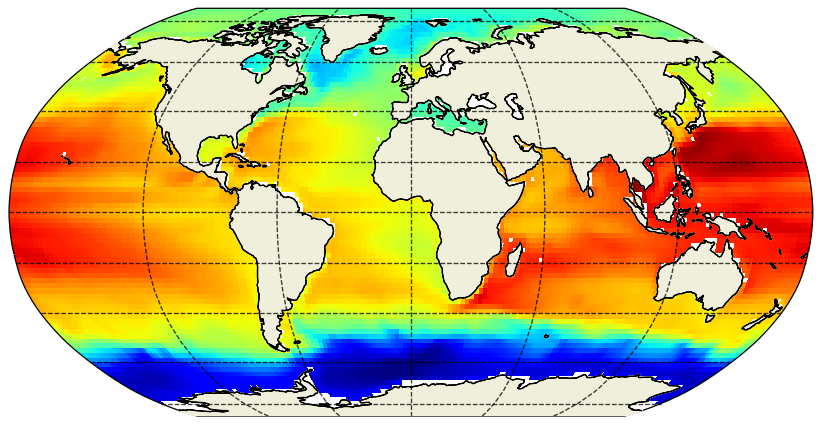

In [22]:
plt.figure(figsize=(12,6), dpi= 90)

tmp_plt = ecco_ds.SSH.isel(time=1)
tmp_plt = tmp_plt.where(ecco_ds.hFacC.isel(k=0) !=0)

ecco.plot_proj_to_latlon_grid(ecco_ds.XC, \
                              ecco_ds.YC, \
                              tmp_plt, \
                              plot_type = 'pcolormesh', \
                              dx=2,\
                              dy=2, \
                              projection_type = 'robin',\
                              less_output = False);

Setting *lon_0* = 110 or -66 yield a global centering that is is more usesful for plotting ocean basins.

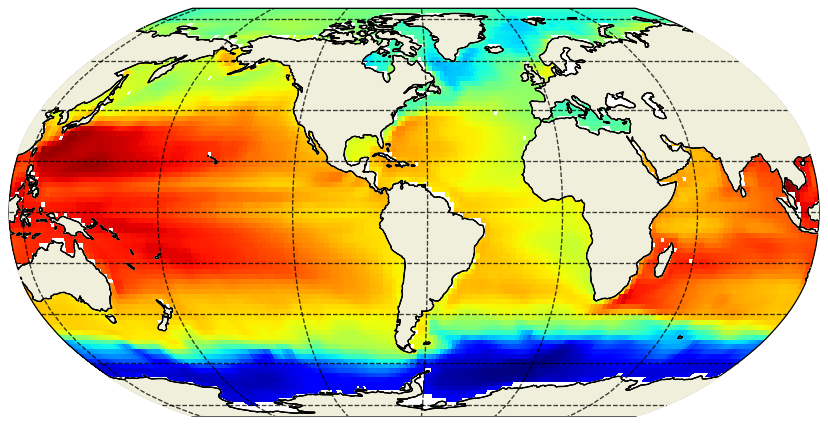

In [23]:
plt.figure(figsize=(12,6), dpi= 90)

tmp_plt = ecco_ds.SSH.isel(time=1)
tmp_plt = tmp_plt.where(ecco_ds.hFacC.isel(k=0) !=0)

ecco.plot_proj_to_latlon_grid(ecco_ds.XC, 
                 ecco_ds.YC, 
                 tmp_plt,user_lon_0=-66,
                 plot_type = 'pcolormesh', dx=2,dy=2);

#### Cylindrical projection

Try the Cylindrical Projection with an interpolated lat-lon resolution of 0.25 degrees and pcolormesh.

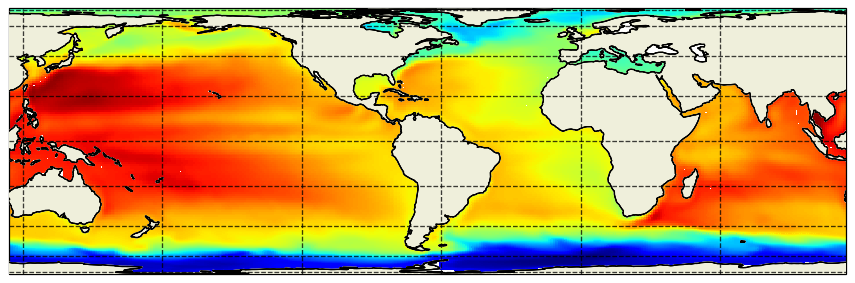

In [24]:
plt.figure(figsize=(12,6), dpi= 90)

tmp_plt = ecco_ds.SSH.isel(time=1)
tmp_plt = tmp_plt.where(ecco_ds.hFacC.isel(k=0) !=0)

ecco.plot_proj_to_latlon_grid(ecco_ds.XC, ecco_ds.YC, \
                              tmp_plt, \
                              user_lon_0=-66,\
                              projection_type='cyl',\
                              plot_type = 'pcolormesh', \
                              dx=.25,dy=.25);

#### Polar stereographic projection

Another isefi; projection built into `plot_proj_to_latlon_grid` is polar stereographic.  The argument *lat_lim* determines the limit of this type of projection.  If *lat_lim* is postive, the projection is centered around the north pole and vice versa.

##### Northern Hemisphere

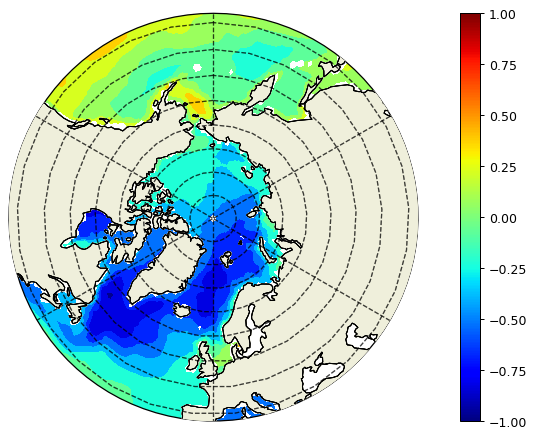

In [25]:
plt.figure(figsize=(12,6), dpi= 90)

tmp_plt = ecco_ds.SSH.isel(time=1)
tmp_plt = tmp_plt.where(ecco_ds.hFacC.isel(k=0) !=0)

ecco.plot_proj_to_latlon_grid(ecco_ds.XC, ecco_ds.YC, \
                              tmp_plt, \
                              projection_type='stereo',\
                              plot_type = 'contourf', \
                              show_colorbar=True,
                              dx=1, dy=1,cmin=-1, cmax=1,\
                              lat_lim=40);
                            

##### Southern Hemisphere

The final example is a south-pole centered plot.  Note that *lat_lim* is now negative.

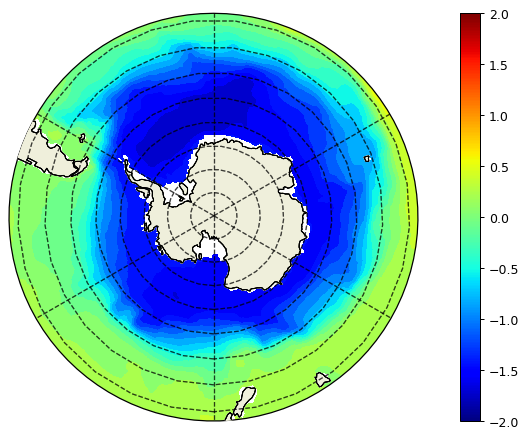

In [26]:
plt.figure(figsize=(12,6), dpi= 90)

tmp_plt = ecco_ds.SSH.isel(time=1)
tmp_plt = tmp_plt.where(ecco_ds.hFacC.isel(k=0) !=0)

ecco.plot_proj_to_latlon_grid(ecco_ds.XC, ecco_ds.YC, \
                              tmp_plt, \
                              projection_type='stereo',\
                              plot_type = 'contourf', \
                              show_colorbar=True,
                              dx=1, dy=1,\
                              lat_lim=-40,cmin=-2,cmax=2);
                             

## Conclusion

You now know several ways of plotting ECCO state estimate fields.  There is a lot more to explore with ``Cartopy`` - dive in and start making your own cool plots!

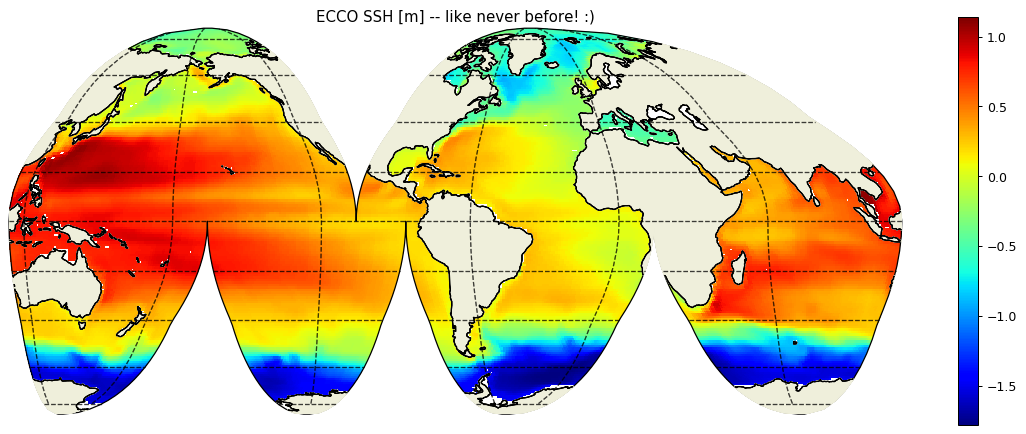

In [27]:
plt.figure(figsize=(16,6), dpi=90)

tmp_plt = ecco_ds.SSH.isel(time=1)
tmp_plt = tmp_plt.where(ecco_ds.hFacC.isel(k=0) !=0)

ecco.plot_proj_to_latlon_grid(ecco_ds.XC, ecco_ds.YC, \
                              tmp_plt, \
                              user_lon_0=-66,\
                              projection_type='InterruptedGoodeHomolosine',\
                              plot_type = 'pcolormesh', \
                              show_colorbar=True,
                              dx=1, dy=1);

plt.title('ECCO SSH [m] -- like never before! :)');